## Transformer

Transformer는 RNN을 사용하지 않지만(딥러닝 구조가 아님), 
기존의 seq2seqc처럼 인코더에서 입력 시퀀스를 입력받고 디코더에서 출력 시퀀스를 출력하는 인코더-디코더 구조를 유지한다. 

하지만, 인코더와 디코더라는 단위가 N개 존재할 수 있다.


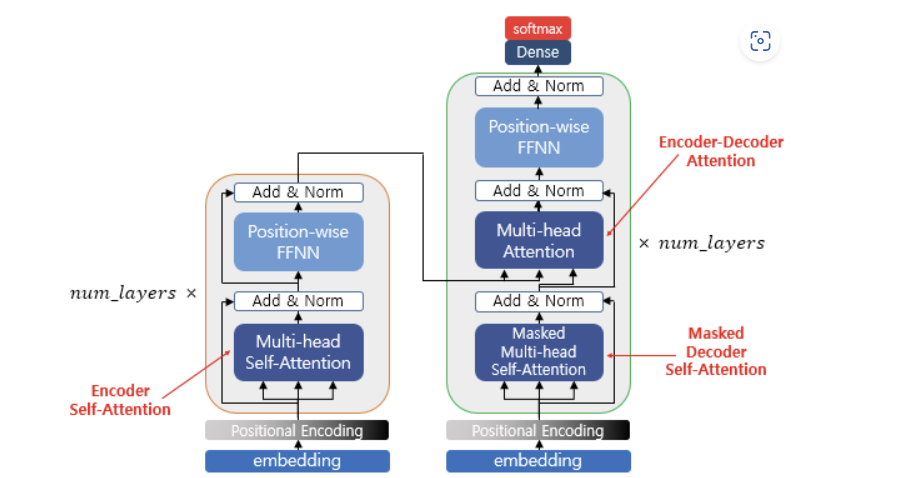

In [1]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

c:\Users\ahyeo\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

### *BERT Tokenize*

In [3]:
# '##'이 앞에 붙어져있으면, 중간에 있는 단어를 나타내는 것 
# 단어 사전에 없는 것들이 분리돼서 출력
result = tokenizer.tokenize('Here is the sentence I want embeddings for.')
print(result)

['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']


In [4]:
print(tokenizer.vocab['here'])
print(tokenizer.vocab['embeddings']) #embeddings는 사전에 등록되어 있지 않기 때문에 ERROR 메세지가 뜬다. 

2182


KeyError: 'embeddings'

### **한국어 Byte Pair Algorithms**

https://github.com/MrBananaHuman/KorNlpTutorial/blob/main/1_%ED%95%9C%EA%B5%AD%EC%96%B4_tokenizing.ipynb


In [5]:
with open('vocabulary.txt', 'w') as f:
    for token in tokenizer.vocab.keys():
        f.write(token + '\n')

In [6]:
df = pd.read_fwf('vocabulary.txt', header = None)
df

,0
0,[PAD]
1,[unused0]
2,[unused1]
3,[unused2]
4,[unused3]
...,...
30517,##．
30518,##／
30519,##：
30520,##？


### *Position Encoding*

Transformer는 단어 입력을 순차적으로 받는 방식이 아니므로 단어의 위치 정보를 다른 방식으로 알려준다.

이를 위해 각 단어의 임베딩 벡터에 위치 정보들을 더해 모델의 입력으로 사용한다.

하지만, LSTM이 아니기 때문에 Sin, Cos 함수를 사용해 행렬을 만들어서 Context Vector들과 더해준다. 

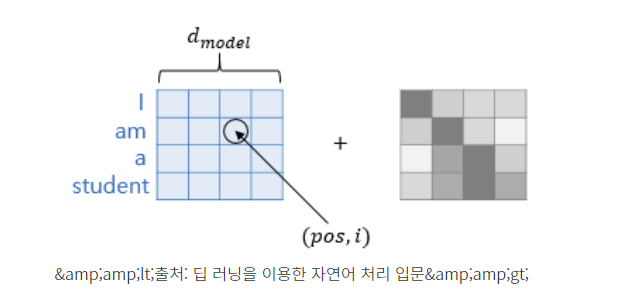

각 임베딩 벡터에 포지셔널 인코딩 값을 더하면 같은 단어라 하더라도 문장 내 위치에 따라 Transformer 입력으로 들어가는 임베딩 벡터 값이 달라진다. (Why? 벡터가 위치 정보를 받으니까!)

단어의 상대적인 위치 정보를 보존하면서, **단어 순서 이해** 및 문장 전체의 **문맥 정보**를 파악하는 데 도움을 준다.

결국, **Transformer 입력은 순서 정보가 고려된 Embedding Vector**이다. 

### *Positional Embedding*

**RNN 기반의 모델에서 사용되는 개념**

Sin, Cos 함수로 만드는 것이 아닌, **학습**을 통해서 위치를 얻는다. (입력 시퀀스를 순차적으로 처리)

Word Piece를 나타낼 수 있는 Position Embedding 층을 Word Piece 위에 만들어준다.

단어 임베딩과 함께 단어의 위치정보를 Embedding 벡터에 함께 Embedding한다. 

Bert Base의 문장 최대 길이는 **512**이므로, 총 512개의 Position Embedding Vector가 학습된다.

하지만, 두 문장 사이의 관계를 나타내는 Segment Embedding 층을 1개 더 사용한다.

### *Bert의 구조*

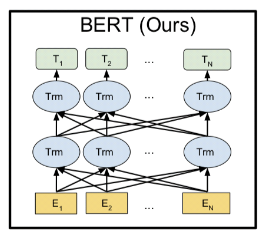

1:1 Fully Connected, 양방향으로 연결되어 있다.

Bert Model을 통해서 바로 예측 가능하다. 

### *Masked Language Model* (사전 훈련 시 사용한 방식)

Bert는 사전 훈련을 위해서 인공 신경망의 입력으로 들어가는 입력 텍스트의 15%를 랜덤으로 Masking한다.

중간에 단어들에 빈칸을 뚫어놓고, 빈칸에 들어갈 단어를 각각 예측하도록 한다. (한 문장에서 15%를 Masking하는 것)


15% 중에서도 12%에 해당하는 단어들은 [MASK]로 변경, 1.5%는 랜덤으로 단어 변경, 그 외는 단어를 동일하게 둔다.


Example (1)

1. The man went to the [MASK]. ; 빈칸 

2. The man went to the dog. ; 오답

3. The man went to the store. ; 정답

Example (2)


'My dog is cute. He likes playing.'


['My', 'dog', 'is', 'cute', 'He', 'likes', 'play', '##ing']로 토큰화 되어 BERT의 입력으로 들어간다. 


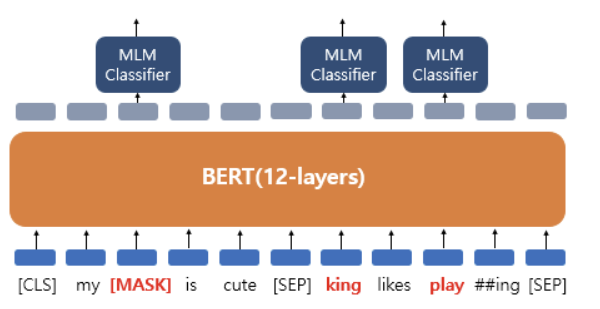


여기서 Masking 되어진 위치들(15%에 해당하는 위치)만 출력층 벡터로 사용된다. (다른 곳은 무시)

이 Masking된 단어들만 학습한다.

### *다음 문장 예측하기*

BERT는 다음 문장을 연관되는 문장인지 아닌지 맞추는 방식으로 훈련한다. 

- 훈련할 시, 2개의 문장이 들어가는데 특별 토큰인 '[sep]'을 사용하여 문장을 분리해준다. 


NSP Classifier에서 두 문장이 이어지는지, 아닌지 분류해서 나타낸다. (이진분류)

**[CLS] 토큰은 BERT가 분류 문제를 풀기 위해 추가된 특별 토큰이다.**


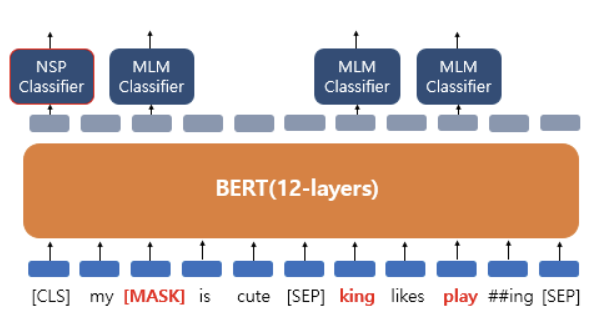

### *Segment Embedding*

Word Piece: 단어를 토큰화해서 나타낸다. (실질적인 입력)

Position: Word Piece의 위치 (위치 정보 학습)

Segment layer: 두 문장을 구분하는 역할 (같은 문장인가? 혹은 다른 문장인가?) 

- 같은 문장이면 0, 다른 문장이면 1로 표기

- 단순히 문장 1개에 대해서 Masking할 때는 필요 없음

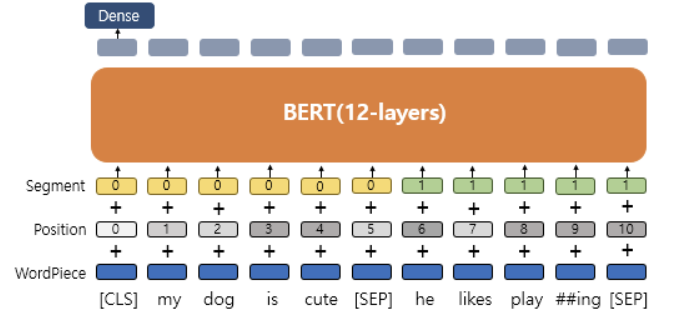

### *Bert Fine-Tuning*

1. 하나의 텍스트에 대한 텍스트 분류 유형


    하나의 문장이 입력되었을 때 Positive인지, Negative인지 이진분류하고 싶은 경우, 문서의 시작을 알리는 [CLS] 토큰 입력 (분류 문제를 풀기 위한 특별 토큰)


2. 하나의 텍스트에 대한 태깅 작업


    문장의 각 단어에 품사를 태깅하는 품사 태깅 작업과 개체를 태깅하는 개체명 인식 작업이 있다.

    BERT는 **사전 학습**이 완료되었고, 각 단어들의 데이터를 가지고 개체명 인식과 같은 추가 학습(**파인튜닝**)을 수행한다.


    기존의 BERT Model은 다음 단어를 예측하도록 학습이 된 Model인데, 추가적인 데이터로 또 다른 학습을 수행한다. (성능 is good)


3. 텍스트 쌍에 대한 분류 또는 회귀 문제


    두 문장이 주어졌을 때, 하나의 문장이 다른 문장과 논리적으로 어떤 관계가 있는지 분류한다. (모순/ 함의/ 중립 관계)

    이러한 TASK의 경우에 입력 텍스트가 1개가 아니므로, 텍스트 사이에 [SEP] 토큰을 집어넣어 Sentence 0, Sentecnce 1 임베딩이라는 두 종류의 **세그먼트 임베딩**을 모두 사용하여 문서를 구분한다. 

4. 질의 응답 (Chat-Bot)


    질문과 본문으로 두 개의 텍스트 쌍을 입력한다. 

**[태깅 구조]**

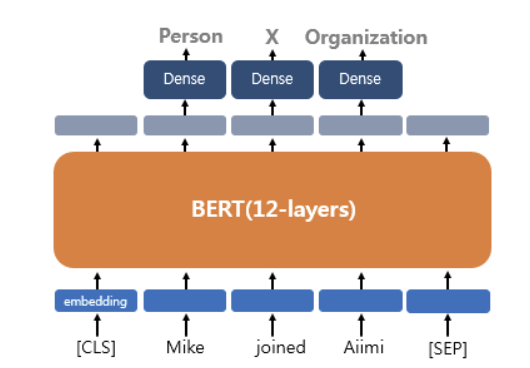

### **Masked 언어 모델 실습** (영어)

BERT Model Library: https://huggingface.co/docs/transformers/model_doc/bert

In [7]:
from transformers import TFBertForMaskedLM #BERT 모델
from transformers import AutoTokenizer #토큰화

In [8]:
model = TFBertForMaskedLM.from_pretrained('bert-large-uncased')
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

All PyTorch model weights were used when initializing TFBertForMaskedLM.

All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [9]:
inputs = tokenizer('Soccer is a really fun [MASK].', return_tensors='tf')

In [10]:
#정수 인코딩 결과 
print(inputs['input_ids'])

tf.Tensor([[ 101 4715 2003 1037 2428 4569  103 1012  102]], shape=(1, 9), dtype=int32)


In [11]:
#문장을 구분하는 세그먼트 인코딩 결과 - 한 문장밖에 없으므로 0 시퀀스만 출력
print(inputs['token_type_ids'])

tf.Tensor([[0 0 0 0 0 0 0 0 0]], shape=(1, 9), dtype=int32)


**Attention Mask**

BERT가 Attention 연산을 할 때, 불필요하게 패딩 토큰에 대해서 어텐션하지 않도록 실제 단어와 패딩 토큰을 구분할 수 있도록 알려주는 입력이다. 

In [12]:
#실제 단어와 패딩 토큰 구분 (불필요한 Padding 태그 없음)
print(inputs['attention_mask'])

tf.Tensor([[1 1 1 1 1 1 1 1 1]], shape=(1, 9), dtype=int32)


In [13]:
from transformers import FillMaskPipeline
pip = FillMaskPipeline(model=model, tokenizer=tokenizer)

In [14]:
pip('Soccer is a really fun [MASK].')

[{'score': 0.7621121406555176,
  'token': 4368,
  'token_str': 'sport',
  'sequence': 'soccer is a really fun sport.'},
 {'score': 0.2034200131893158,
  'token': 2208,
  'token_str': 'game',
  'sequence': 'soccer is a really fun game.'},
 {'score': 0.012208542786538601,
  'token': 2518,
  'token_str': 'thing',
  'sequence': 'soccer is a really fun thing.'},
 {'score': 0.0018630251288414001,
  'token': 4023,
  'token_str': 'activity',
  'sequence': 'soccer is a really fun activity.'},
 {'score': 0.0013354840921238065,
  'token': 2492,
  'token_str': 'field',
  'sequence': 'soccer is a really fun field.'}]

In [15]:
pip('The Avengers is a really fun [MASK].')

[{'score': 0.2562893331050873,
  'token': 2265,
  'token_str': 'show',
  'sequence': 'the avengers is a really fun show.'},
 {'score': 0.17284128069877625,
  'token': 3185,
  'token_str': 'movie',
  'sequence': 'the avengers is a really fun movie.'},
 {'score': 0.11107710003852844,
  'token': 2466,
  'token_str': 'story',
  'sequence': 'the avengers is a really fun story.'},
 {'score': 0.07248979806900024,
  'token': 2186,
  'token_str': 'series',
  'sequence': 'the avengers is a really fun series.'},
 {'score': 0.0704665333032608,
  'token': 2143,
  'token_str': 'film',
  'sequence': 'the avengers is a really fun film.'}]

In [16]:
pip('I went to [MASK] this morning.')

[{'score': 0.3573071360588074,
  'token': 2147,
  'token_str': 'work',
  'sequence': 'i went to work this morning.'},
 {'score': 0.2330440729856491,
  'token': 2793,
  'token_str': 'bed',
  'sequence': 'i went to bed this morning.'},
 {'score': 0.12845073640346527,
  'token': 2082,
  'token_str': 'school',
  'sequence': 'i went to school this morning.'},
 {'score': 0.062305692583322525,
  'token': 3637,
  'token_str': 'sleep',
  'sequence': 'i went to sleep this morning.'},
 {'score': 0.04695269465446472,
  'token': 2465,
  'token_str': 'class',
  'sequence': 'i went to class this morning.'}]

In [17]:
pip("It's very [MASK] today.")

[{'score': 0.2957328259944916,
  'token': 2980,
  'token_str': 'hot',
  'sequence': "it's very hot today."},
 {'score': 0.16472698748111725,
  'token': 3147,
  'token_str': 'cold',
  'sequence': "it's very cold today."},
 {'score': 0.08292841166257858,
  'token': 4251,
  'token_str': 'quiet',
  'sequence': "it's very quiet today."},
 {'score': 0.06948840618133545,
  'token': 4010,
  'token_str': 'warm',
  'sequence': "it's very warm today."},
 {'score': 0.03964260593056679,
  'token': 3376,
  'token_str': 'beautiful',
  'sequence': "it's very beautiful today."}]

### **Masked 언어 모델 실습** (한국어)

In [18]:
model = TFBertForMaskedLM.from_pretrained('klue/bert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForMaskedLM: ['cls.predictions.decoder.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForMaskedLM from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForMaskedLM from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [19]:
inputs = tokenizer('축구는 정말 재미있는 [MASK]다.', return_tensors='tf')

In [20]:
print(inputs['input_ids'])

tf.Tensor([[   2 4713 2259 3944 6001 2259    4  809   18    3]], shape=(1, 10), dtype=int32)


In [21]:
print(inputs['token_type_ids'])

tf.Tensor([[0 0 0 0 0 0 0 0 0 0]], shape=(1, 10), dtype=int32)


In [22]:
print(inputs['attention_mask'])

tf.Tensor([[1 1 1 1 1 1 1 1 1 1]], shape=(1, 10), dtype=int32)


In [23]:
from transformers import FillMaskPipeline
pip = FillMaskPipeline(model=model, tokenizer=tokenizer)

In [24]:
pip('축구는 정말 재미있는 [MASK]다.')

[{'score': 0.896351158618927,
  'token': 4559,
  'token_str': '스포츠',
  'sequence': '축구는 정말 재미있는 스포츠 다.'},
 {'score': 0.025957714766263962,
  'token': 568,
  'token_str': '거',
  'sequence': '축구는 정말 재미있는 거 다.'},
 {'score': 0.010033994913101196,
  'token': 3682,
  'token_str': '경기',
  'sequence': '축구는 정말 재미있는 경기 다.'},
 {'score': 0.00792439840734005,
  'token': 4713,
  'token_str': '축구',
  'sequence': '축구는 정말 재미있는 축구 다.'},
 {'score': 0.007844245992600918,
  'token': 5845,
  'token_str': '놀이',
  'sequence': '축구는 정말 재미있는 놀이 다.'}]

In [25]:
pip('나는 오늘 아침에 [MASK]에 출근을 했다.')

[{'score': 0.08012561500072479,
  'token': 3769,
  'token_str': '회사',
  'sequence': '나는 오늘 아침에 회사 에 출근을 했다.'},
 {'score': 0.061240993440151215,
  'token': 1,
  'token_str': '[UNK]',
  'sequence': '나는 오늘 아침에 에 출근을 했다.'},
 {'score': 0.01748666912317276,
  'token': 4345,
  'token_str': '공장',
  'sequence': '나는 오늘 아침에 공장 에 출근을 했다.'},
 {'score': 0.016131775453686714,
  'token': 5841,
  'token_str': '사무실',
  'sequence': '나는 오늘 아침에 사무실 에 출근을 했다.'},
 {'score': 0.015360763296484947,
  'token': 3671,
  'token_str': '서울',
  'sequence': '나는 오늘 아침에 서울 에 출근을 했다.'}]

In [26]:
pip('어벤져스는 정말 재미있는 [MASK]다.')

[{'score': 0.8382413983345032,
  'token': 3771,
  'token_str': '영화',
  'sequence': '어벤져스는 정말 재미있는 영화 다.'},
 {'score': 0.028275543823838234,
  'token': 568,
  'token_str': '거',
  'sequence': '어벤져스는 정말 재미있는 거 다.'},
 {'score': 0.017189281061291695,
  'token': 4665,
  'token_str': '드라마',
  'sequence': '어벤져스는 정말 재미있는 드라마 다.'},
 {'score': 0.014989669434726238,
  'token': 3758,
  'token_str': '이야기',
  'sequence': '어벤져스는 정말 재미있는 이야기 다.'},
 {'score': 0.009382639080286026,
  'token': 4938,
  'token_str': '장소',
  'sequence': '어벤져스는 정말 재미있는 장소 다.'}]

In [27]:
pip('어밴져스는 정말 재미있는 [MASK]다.') #단어의 통일성 같은 부분에서 성능이 떨어진다. 

[{'score': 0.1477716714143753,
  'token': 4559,
  'token_str': '스포츠',
  'sequence': '어밴져스는 정말 재미있는 스포츠 다.'},
 {'score': 0.14689140021800995,
  'token': 3771,
  'token_str': '영화',
  'sequence': '어밴져스는 정말 재미있는 영화 다.'},
 {'score': 0.07756846398115158,
  'token': 568,
  'token_str': '거',
  'sequence': '어밴져스는 정말 재미있는 거 다.'},
 {'score': 0.031371232122182846,
  'token': 3758,
  'token_str': '이야기',
  'sequence': '어밴져스는 정말 재미있는 이야기 다.'},
 {'score': 0.021993035450577736,
  'token': 4665,
  'token_str': '드라마',
  'sequence': '어밴져스는 정말 재미있는 드라마 다.'}]

In [28]:
pip('졸릴 때는 [MASK]가 최고다.')

[{'score': 0.03844769671559334,
  'token': 3771,
  'token_str': '영화',
  'sequence': '졸릴 때는 영화 가 최고다.'},
 {'score': 0.033141519874334335,
  'token': 4930,
  'token_str': '커피',
  'sequence': '졸릴 때는 커피 가 최고다.'},
 {'score': 0.03006269782781601,
  'token': 10637,
  'token_str': '유튜브',
  'sequence': '졸릴 때는 유튜브 가 최고다.'},
 {'score': 0.02838464081287384,
  'token': 23026,
  'token_str': '넷플릭스',
  'sequence': '졸릴 때는 넷플릭스 가 최고다.'},
 {'score': 0.028243742883205414,
  'token': 1,
  'token_str': '[UNK]',
  'sequence': '졸릴 때는 가 최고다.'}]

이것보다 성능이 더 좋길 원하면, Pine-Tuning 하기 !

### **다음 문장 예측하기** (영어)

In [29]:
import tensorflow as tf
from transformers import TFBertForNextSentencePrediction
from transformers import AutoTokenizer

In [30]:
model = TFBertForNextSentencePrediction.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForNextSentencePrediction.

All the weights of TFBertForNextSentencePrediction were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForNextSentencePrediction for predictions without further training.


In [31]:
#이어지는 문장 
prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
next_sentence = "pizza is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand."

In [32]:
encoding = tokenizer(prompt, next_sentence, return_tensors='tf')

In [33]:
print(encoding['input_ids'])

tf.Tensor(
[[  101  1999  3304  1010 10733  2366  1999  5337 10906  1010  2107  2004
   2012  1037  4825  1010  2003  3591  4895 14540  6610  2094  1012   102
  10733  2003  8828  2007  1996  2224  1997  1037  5442  1998  9292  1012
   1999 10017 10906  1010  2174  1010  2009  2003  3013  2046 17632  2015
   2000  2022  8828  2096  2218  1999  1996  2192  1012   102]], shape=(1, 58), dtype=int32)


In [34]:
#특별 토큰 [CLS], [SEP]
print(tokenizer.cls_token, ':', tokenizer.cls_token_id)
print(tokenizer.sep_token, ':' , tokenizer.sep_token_id)

[CLS] : 101
[SEP] : 102


In [35]:
print(tokenizer.decode(encoding['input_ids'][0]))

[CLS] in italy, pizza served in formal settings, such as at a restaurant, is presented unsliced. [SEP] pizza is eaten with the use of a knife and fork. in casual settings, however, it is cut into wedges to be eaten while held in the hand. [SEP]


In [36]:
print(encoding['token_type_ids'])

tf.Tensor(
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]], shape=(1, 58), dtype=int32)


In [37]:
logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]
softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print(probs)

tf.Tensor([[9.9999714e-01 2.8381855e-06]], shape=(1, 2), dtype=float32)


In [38]:
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [0]


In [39]:
#이어지지 않는 문장
prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
next_sentence = "The sky is blue due to the shorter wavelength of blue light."
encoding = tokenizer(prompt, next_sentence, return_tensors='tf')

logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0] #0, 1의 확률

softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [1]


### **다음 문장 예측하기** (한국어)

In [40]:
model = TFBertForNextSentencePrediction.from_pretrained('klue/bert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForNextSentencePrediction: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForNextSentencePrediction from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForNextSentencePrediction from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForNextSentencePrediction were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForNextSentencePrediction for predictions without further training.


In [42]:
# 이어지는 두 개의 문장
prompt = "2002년 월드컵 축구대회는 일본과 공동으로 개최되었던 세계적인 큰 잔치입니다."
next_sentence = "여행을 가보니 한국의 2002년 월드컵 축구대회의 준비는 완벽했습니다."
encoding = tokenizer(prompt, next_sentence, return_tensors='tf')

logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]

softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [0]


In [43]:
# 상관없는 두 개의 문장
prompt = "2002년 월드컵 축구대회는 일본과 공동으로 개최되었던 세계적인 큰 잔치입니다."
next_sentence = "극장가서 로맨스 영화를 보고싶어요"
encoding = tokenizer(prompt, next_sentence, return_tensors='tf')

logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]

softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [1]


In [44]:
# 예시
prompt = "오늘 날씨가 너무 덥다."
next_sentence = "물 좀 가져와라."
encoding = tokenizer(prompt, next_sentence, return_tensors='tf')

logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]

softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [0]


**아래의 예시**

다른데 비슷한 문장들을 학습할 때 이어지는 문장으로 학습했기 때문에, 이 또한 이어지는 문장으로 예측한다. 

데이터가 부족하여 생기는 현상이므로, 추가적인 학습을 통해 성능을 더 올려준다.

In [45]:
# 예시 - 오 제대로 예측을 못함 !! (학습을 제대로 못 했기 때문이지)
prompt = "오늘 날씨가 너무 덥다."
next_sentence = "가방 좀 가져와라."
encoding = tokenizer(prompt, next_sentence, return_tensors='tf')

logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids'])[0]

softmax = tf.keras.layers.Softmax()
probs = softmax(logits)
print('최종 예측 레이블 :', tf.math.argmax(probs, axis=-1).numpy())

최종 예측 레이블 : [0]


**[참고 - CNN]** 

CNN에서의 Pooling 연산: 특정값 추출

다양한 특징들 중에서도 가장 강력한 특징 하나를 Pooling을 통해서 얻어낸다.


위의 연산이 **Sentence Bert**에서 사용된다. (모순, 중립, 수반관계 확인)

1. 문장 쌍 분류

    각각의 단어에 대한 출력 벡터들에 평균을 내고 이를 문장 벡터로 본다. (모든 단어의 의미 반영)

    Sentence Bert는 다중 class 분류에서 사용, 클래스가 K라면, 가중치 행렬은 3n * K 가 된다. (3n은 BERT의 출력 차원 수)


2. 문장 쌍 회귀 

    두 문장을 BERT의 입력으로 넣고 평균 풀링, 맥스 풀링을 통해서 각 문장 임베딩 벡터를 얻는다.

    이 두 벡터에 대한 COS 유사도를 구한다. - 두 문장의 유사도 (레이블 범위: 0 ~ 5점)

### GPT

In [46]:
import numpy as np
import random
import tensorflow as tf
from transformers import AutoTokenizer
from transformers import TFGPT2LMHeadModel # 2개의 문장이 이어지는 문장 관계인지 여부를 판단하는 GPT 구조

In [47]:
model = TFGPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained('skt/kogpt2-base-v2')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2LMHeadModel: ['transformer.h.0.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'lm_head.weight', 'transformer.h.1.attn.masked_bias']
- This IS expected if you are initializing TFGPT2LMHeadModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2LMHeadModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassifica

In [48]:
sent = '근육이 커지기 위해서는'

In [52]:
input_ids = tokenizer.encode(sent)
input_ids = tf.convert_to_tensor([input_ids]) #tensor로 변환작업
print(input_ids) #4개의 정수 sequence ([CLS] 근육이 커지기 위해서는 [SEP])

tf.Tensor([[33245 10114 12748 11357]], shape=(1, 4), dtype=int32)


In [51]:
#4개의 정수 sequence를 통해 문장 생성 
output = model.generate(input_ids,
                        max_length=10, #최대 길이 지정 (여러개의 문장 생성)
                        repetition_penalty=2.0,
                        use_cache=True)
output_ids = output.numpy().tolist()[0] #이 부분을 이제 단어로 변환해줄거임
print(output_ids)

[33245, 10114, 12748, 11357, 23879, 39306, 9684, 7884, 10211, 15177]


In [53]:
#숫자 - 단어로 변환
tokenizer.decode(output_ids)

'근육이 커지기 위해서는 무엇보다 규칙적인 생활습관이 중요하다.\n'

In [54]:
#확률이 가장 높은 단어 5개 출력 (softmax 큰 순)
output = model(input_ids)
top5 = tf.math.top_k(output.logits[0, -1], k=5)

In [55]:
tokenizer.convert_ids_to_tokens(top5.indices.numpy())

['▁무엇보다', '▁우선', '▁반드시', '▁피부', '▁무엇보다도']

In [56]:
sent = '근육이 커지기 위해서는'
input_ids = tokenizer.encode(sent)

while len(input_ids) < 50:
    output = model(np.array([input_ids]))
    # Top 5의 단어들을 추출
    top5 = tf.math.top_k(output.logits[0, -1], k=5)
    # Top 5의 단어들 중 랜덤으로 다음 단어로 선택.
    token_id = random.choice(top5.indices.numpy())
    input_ids.append(token_id)

tokenizer.decode(input_ids)

'근육이 커지기 위해서는 우선 균형감 있게 균형잡혀 있는 식사를 해야한다.\n또한 균형잡히는 식습관과 균형 잡힌 식단으로 균형잡혀있는 식사를 통해 건강한 삶을 유지하도록 노력하자!\n1. 건강한 식생활을 위한 균형 있는 식사를 통해 건강'

### BERT Fine-Tuning 참고 

https://mccormickml.com/2019/07/22/BERT-fine-tuning/

**[한국어 데이터]**

1. 워드투워드

2. 페스트텍스트

3. Doc2Vec (문서를 Embedding - 문서 단위 비교)